<a href="https://colab.research.google.com/github/Mahdi-0599/NLP-HATESPEECH/blob/master/model_rnn_hate_speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* # Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

### Load the data into Pandas dataframe

In [ ]:
df = pd.read_csv('../input/hate-speech-twitter-train-and-test/train_E6oV3lV.csv',delimiter=',',encoding='latin-1')
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.Ã°Â...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


Drop the columns that are not required for the neural network.

In [ ]:
df.drop(['id'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


Understand the distribution better.

Text(0.5,1,'Number of ham and spam messages')

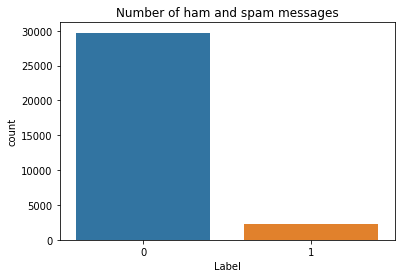

In [ ]:
sns.countplot(df.label)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [ ]:
def eval_fun(labels, preds):
    labels = label.split(' ')
    preds = tweet.split(' ')
    rr = (np.intersect1d(label, tweet))
    precision = np.float(len(rr)) / len(tweet)
    recall = np.float(len(rr)) / len(label)
    try:
        f1 = 2 * precision * recall / (precision + recall)
    except ZeroDivisionError:
        return (precision, recall, 0.0)
    return (precision, recall, f1)
print(1)

1


In [ ]:
import numpy as np
print("Hatred labeled: {}\nNon-hatred labeled: {}".format(
    (df.label == 1).sum(),
    (df.label == 0).sum()
))

Hatred labeled: 2242
Non-hatred labeled: 29720


 ## Extracting features

Hashtags and mentions

In [ ]:
hashtags = df['tweet'].str.extractall('#(?P<hashtag>[a-zA-Z0-9_]+)').reset_index().groupby('level_0').agg(lambda x: ' '.join(x.values))
df.loc[:, 'hashtags'] = hashtags['hashtag']
df['hashtags'].fillna('', inplace=True)

df.loc[:, 'mentions'] = df['tweet'].str.count('@[a-zA-Z0-9_]+')

df.tweet = df.tweet.str.replace('@[a-zA-Z0-9_]+', '')

Removing anything but the words

In [ ]:
df.tweet = df.tweet.str.replace('[^a-zA-Z]', ' ')

Lemmatization

We lemmatize tweets' words as we have the sentences and we can tag part of speeches, and will stem hashtags.

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag, FreqDist, word_tokenize

stemmer = SnowballStemmer('english')
lemmer = WordNetLemmatizer()

part = {
    'N' : 'n',
    'V' : 'v',
    'J' : 'a',
    'S' : 's',
    'R' : 'r'
}

def convert_tag(penn_tag):
    if penn_tag in part.keys():
        return part[penn_tag]
    else:
        return 'n'


def tag_and_lem(element):
    sent = pos_tag(word_tokenize(element))
    return ' '.join([lemmer.lemmatize(sent[k][0], convert_tag(sent[k][1][0]))
                    for k in range(len(sent))])
    

df.loc[:, 'tweet'] = df['tweet'].apply(lambda x: tag_and_lem(x))
df.loc[:, 'hashtags'] = df['hashtags'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

* Create input and output vectors.
* Process the labels.

In [ ]:
X = df.tweet
Y = df.label
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

Split into training and test data.

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30)

### Process the data
* Tokenize the data and convert the text to sequences.
* Add padding to ensure that all the sequences have the same shape.
* There are many ways of taking the *max_len* and here an arbitrary length of 150 is chosen.

In [ ]:
max_words = 1000
max_len = 100
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

### RNN
Define the RNN structure.

In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(64,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

Call the function and compile the model.

In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 100)               0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 100, 50)           50000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 64)                4160      
_________________________________________________________________
activation_7 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 65        
__________

Fit on the training data.

In [ ]:
#history = model.fit(sequences_matrix,Y_train,batch_size=64,epochs=10,
#          validation_split=0.2)

In [ ]:
history = model.fit(sequences_matrix,Y_train,batch_size=64,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 17898 samples, validate on 4475 samples
Epoch 1/10
17898/17898 [==============================] - 37s 2ms/step - loss: 0.1345 - acc: 0.9518 - val_loss: 0.1662 - val_acc: 0.9477
Epoch 2/10
17898/17898 [==============================] - 42s 2ms/step - loss: 0.1303 - acc: 0.9522 - val_loss: 0.1628 - val_acc: 0.9473
Epoch 3/10
17898/17898 [==============================] - 37s 2ms/step - loss: 0.1260 - acc: 0.9547 - val_loss: 0.1620 - val_acc: 0.9491


The model performs well on the validation set and this configuration is chosen as the final model.

Process the test set data.

In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

Evaluate the model on the test set.

In [ ]:
accr = model.evaluate(test_sequences_matrix,Y_test)

9589/9589 [==============================] - 5s 508us/step


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.153
  Accuracy: 0.949


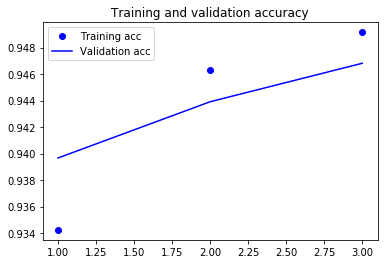

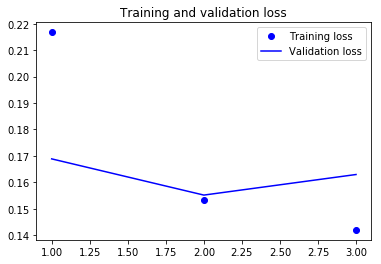

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()